<a href="https://colab.research.google.com/github/f00-/alternative-methods-of-regression-with-python/blob/master/Chapter_2_Constructing_and_Checking_the_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2 - Constructing and Checking the Model

## 2.1 Introduction
In this chapter, before focusing on the various methods of estimatino and testing presenting in the remaining chapters, we first consider the overall plan of statistical analysis in which these methods are intended to be used.

Data analysis can be viewed as model construction. A model is proposed and then checked to see how well it fits the data. If the fit is inadequate, the model is modified. The process of checkign and modifying the model is iterated until a suitable model is found.

Estimating and testing of regression coefficients are important tools in model construction.

### Proposing a Model.

### The Assumptions

## 2.2 Checking the Model

### Plotting the Data.

### Plotting the Residuals

### Testing the Explanatory Variables

## 2.3 Modifying the Model

### Nonlinearity

### Unequal Varianes

### Outliers

## 2.4 Examples

### Example 1 - Turnip data

### Example 2 - Fire data



In [13]:
import pandas as pd
import math

turnips_df = pd.read_csv("https://github.com/f00-/alternative-methods-of-regression-with-python/raw/master/turnips.csv")
turnips_df.head(27)

,id,vitamin b_2,sunlight,soil moisture,air temperature
0,1,110.4,176,7.0,78
1,2,102.8,155,7.0,89
2,3,101.0,273,7.0,89
3,4,108.4,273,7.0,72
4,5,100.7,256,7.0,84
5,6,100.3,280,7.0,87
6,7,102.0,280,7.0,74
7,8,93.7,184,7.0,87
8,9,98.9,216,7.0,88
9,10,96.6,198,2.0,76


## Figure 2.1 Data plots for the turnip data

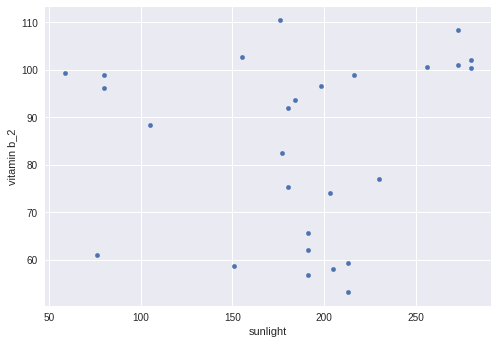

In [6]:
turnips_df.plot(x='sunlight', y='vitamin b_2', kind="scatter")

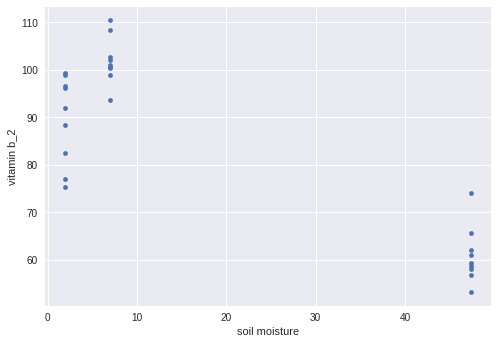

In [7]:
turnips_df.plot(x='soil moisture', y='vitamin b_2', kind="scatter")

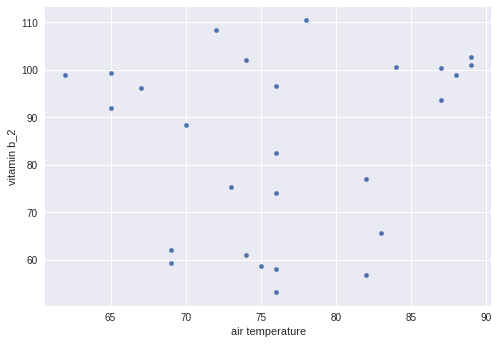

In [8]:
turnips_df.plot(x='air temperature', y='vitamin b_2', kind="scatter")

In [16]:
fire_df = pd.read_csv("https://raw.githubusercontent.com/f00-/alternative-methods-of-regression-with-python/master/fire.csv")
fire_df.head(30)

,Unnamed: 0,zipcode,x,FIRE,THEFT,AGE,y,z,INCOME
0,0,60626,10.0,6.2,29,60.4,5.3,0.0,11744
1,1,60640,22.2,9.5,44,76.5,3.1,0.1,9323
2,2,60613,19.6,10.5,36,73.5,4.8,1.2,9948
3,3,60657,17.3,7.7,37,66.9,5.7,0.5,10656
4,4,60614,24.5,8.6,53,81.4,5.9,0.7,9730
5,5,60610,54.0,34.1,68,52.6,4.0,0.3,8231
6,6,60611,4.9,11.0,75,42.6,7.9,0.0,21480
7,7,60625,7.1,6.9,18,78.5,6.9,0.0,11104
8,8,60618,5.3,7.3,31,90.1,7.6,0.4,10694
9,9,60647,21.5,15.1,25,89.8,3.1,1.1,9631


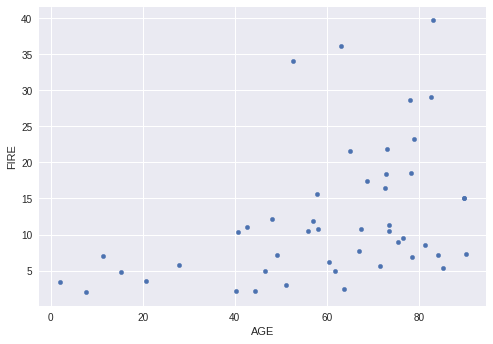

In [10]:
fire_df.plot(x="AGE", y="FIRE", kind="scatter")

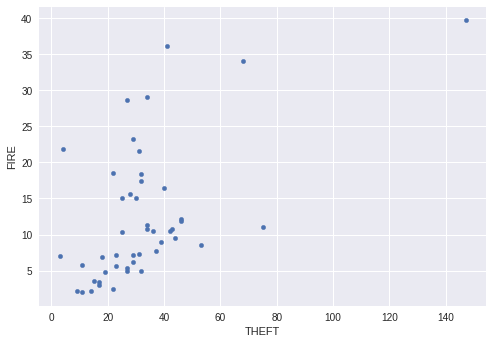

In [11]:
fire_df.plot(x="THEFT", y="FIRE", kind="scatter")

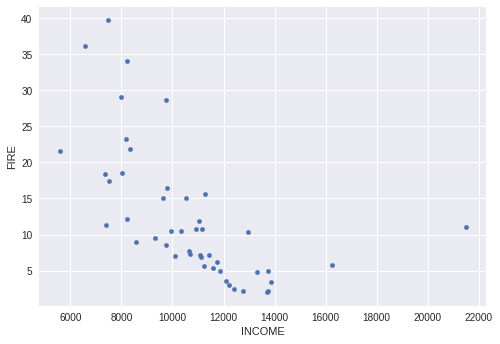

In [12]:
fire_df.plot(x="INCOME", y="FIRE", kind="scatter")

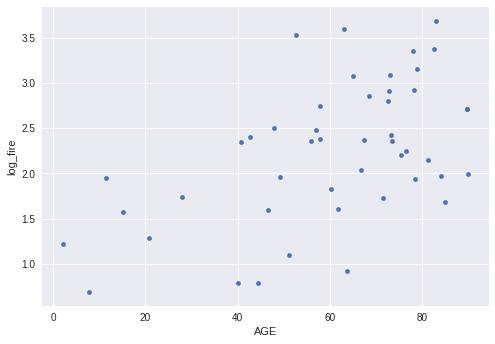

In [17]:
fire_df['log_fire'] = fire_df.apply(lambda row: math.log(row.FIRE), axis=1)
# todo remove area 7 and 25 (outliers)
fire_df.plot(x="AGE", y="log_fire", kind="scatter")

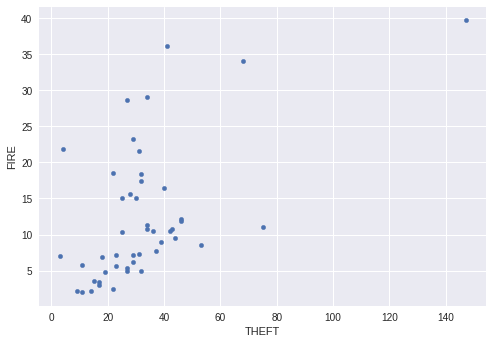

In [18]:
fire_df.plot(x="THEFT", y="FIRE", kind="scatter")

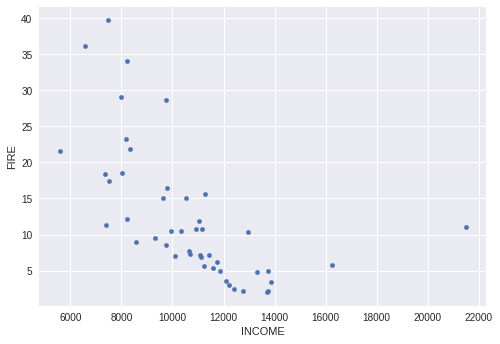

In [19]:
fire_df.plot(x="INCOME", y="FIRE", kind="scatter")